This is a test for searching asteroid tracks using Hough Transform 

In [1]:
%matplotlib inline
from numpy import *
from matplotlib import pyplot as plt
from scipy.spatial import KDTree
import sys

Below define the funtion of hough transform, for given x and y, return an 1-D array r(theta)

In [40]:
def hough(x,y):
    theta = arange(0, 180, 0.1)/180.*pi
    #theta = (0.1*(array(range(10*180))+10*0)/180.*pi)
    r = x*cos(theta)+y*sin(theta)
    return r

Now, load the data

In [41]:
data = loadtxt('nonstationary3', dtype={'names':('mjd', 'ra', 'dec'), 'formats':('f8','f4','f4')})
data = sort(data,  order='ra')[::-1]
ra = data['ra']
dec = data['dec']

Plot them in RA, Dec space

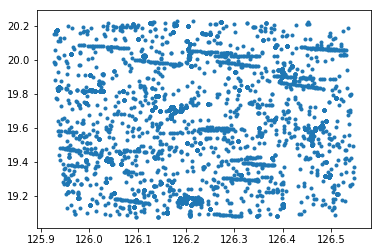

In [42]:
plt.scatter(ra, dec, marker='.')

Find pairs, remove the stand alone detections 

In [43]:
def clean(ra,dec):
    tree = KDTree(zip(ra,dec))
    pair = tree.query_ball_tree(tree, 30/3600.)
    stationary = tree.query_ball_tree(tree, 1.5/3600.)
    mask = zeros(len(ra),dtype=bool)
    for n, i in enumerate(pair):
        if len(i) > 2 and len(stationary[n])==1:
            mask[n]= 1
        else:
            mask[n]= 0       
    return mask

Clean the data

125.929 19.0784


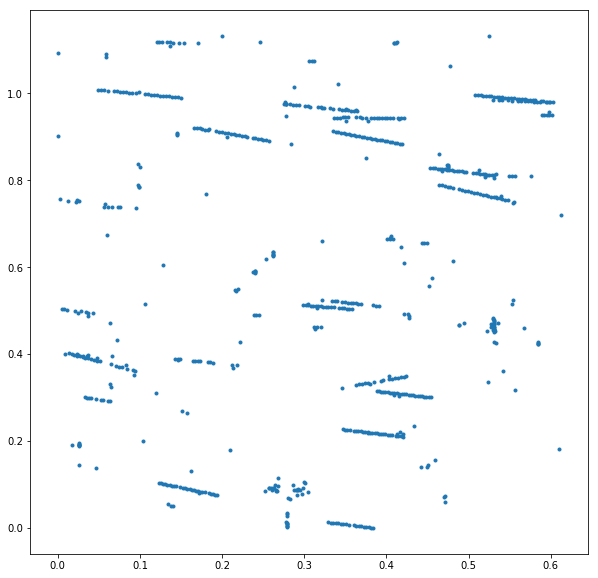

In [44]:
global ra, dec
mask = clean(ra,dec)
ra0 = ra[mask]
dec0 = dec[mask]
print ra0.min(), dec0.min()
ra = ra0-min(ra0)
dec = dec0-min(dec0)
plt.figure(figsize=[10,10])
plt.scatter(ra,dec, marker='.')

Now, let's find the concentration points in Hough space

In [45]:
result = map(hough, ra, dec)

-0.61076411679 0.945283261782


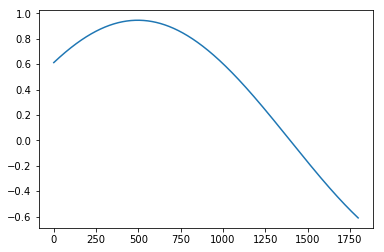

In [46]:
plt.plot(result[0])
print result[0].min(), result[0].max()

In [47]:
hist = zeros([1000,1800])
for i in result:
    for n, j in enumerate(i):
        j=int(400*(j+1))
        hist[j][n]+=1

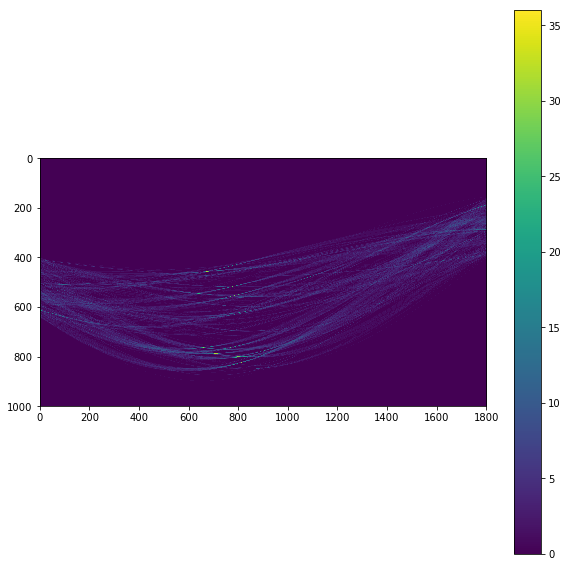

In [48]:
plt.figure(figsize=[10,10])
im = plt.imshow(hist)
plt.colorbar(im)

inverse transfer to get 'a' and 'b'

In [57]:
def line(r_theta):
    r, theta = r_theta
    a = -1/tan(theta*pi/180.)
    b = r/sin(theta*pi/180.)
    return a, b

In [59]:
r_theta = zip((where(hist >8)[0]+0.5)/400.-1,(where(hist >8)[1]+0.5)/10.)
#print where(hist >20)[0]/200.-1,where(hist >20)[1]/2.+45

Mark them on ra, dec plot

In [62]:
def plot_line(a_b):
    a,b = a_b
    for i in range(len(ra)):
        #print dec[i], a*ra[i]+b
        dis = ((dec[i]-a*ra[i]-b)**2 + (ra[i]-dec[i]/a+b/a)**2)**0.5
        if dis < 0.0003:
            plt.scatter(ra[i],dec[i], c='r', marker='_')

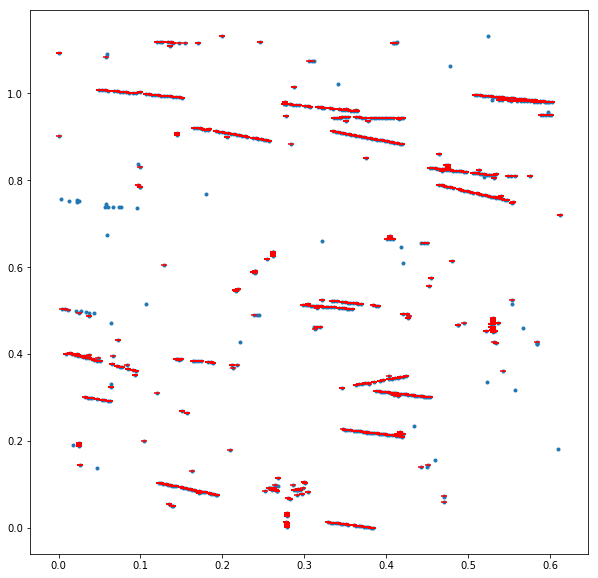

In [63]:
plt.figure(figsize=[10,10])
plt.scatter(ra,dec,marker='.')
plot = map(plot_line, map(line, r_theta))